# Reference:

* https://www.youtube.com/watch?v=xvqsFTUsOmc

# The Data Science Workflow


1. The first step is to start with a question
2.  Get and clean the data
3.  Perform EDA-Exploratory Data Analysis
4.  Apply Techniques
5.  Share insights

### 1. Ask a question
* If I study more, will I get better grades

### 2. Get and clean the data

* The type of data you will get here are: 
    1. Students 
    2. No of hours spent studying by each student
    3. Grades of each student
    

In [1]:
import pandas as pd

In [2]:
Student = ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace']
Hours_Studied = [20, 5, 10, 15, 'two', 16, 22]
Grades = [90, 70, 96, 82, 62, 87, 998]

data = pd.DataFrame({'Students': Student,
                     'Hours Studied': Hours_Studied,
                     'Grades': Grades})

data.head(10)

,Students,Hours Studied,Grades
0,Alice,20,90
1,Bob,5,70
2,Charlie,10,96
3,David,15,82
4,Eve,two,62
5,Frank,16,87
6,Grace,22,998


* In the data above, we can see some 'errors', like on the 5th row, we have a string, 'two' instead of an integer, 2
* And Grace also has a grade of 998 which is impossible
* Obviously, these are parts of our data we need to clean.

In [3]:
# Cleaning the data
Student = ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace']
Hours_Studied = [20, 5, 10, 15, 2, 16, 22]
Grades = [90, 70, 96, 82, 62, 87, 98]

data = pd.DataFrame({'Students': Student,
                     'Hours Studied': Hours_Studied,
                     'Grades': Grades})

data.head(10)

,Students,Hours Studied,Grades
0,Alice,20,90
1,Bob,5,70
2,Charlie,10,96
3,David,15,82
4,Eve,2,62
5,Frank,16,87
6,Grace,22,98


In [4]:
#Our data has been cleaned

### 3. Perform EDA 
* EDA means we want to see if our data makes sense, this is typically done through visualization techniques



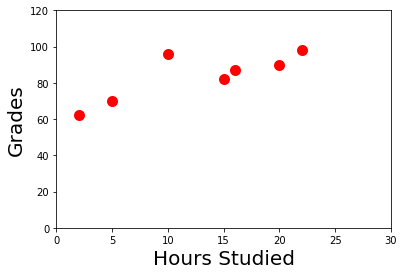

In [5]:
import matplotlib.pyplot as plt

plt.scatter(data['Hours Studied'], data['Grades'], lw = 5, c='red')
plt.xlabel('Hours Studied', size = 20)
plt.ylabel('Grades', size=20)
plt.xlim(0, 30)
plt.ylim(0, 120)
plt.show()

* From the graph, we can see that the more time you spend studying, the higher your grade
* Although we can see a particular student who spent small time studying and still got a high grade, that student is Charlie, Charlie is genius, be like Charlie

### 4. Apply Techniques

* The most basic Data Science is appyling a linear regression.
* A Linear Regression model is a Machine learning model, in which a line of best fit is plotted on the given data.
* This line as an equation y_hat = Wx + b (Same as the equation of a line). Where:
    * W = weights(slope of the line, also the coefficient of our features) - Independent variable
    * b = bias (intercept on the y-axis) - Independent variable
    * y_hat = predicted values of y - Dependent varaible

In [6]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()


In [7]:
import numpy as np


X = data['Hours Studied']
y = data['Grades']

#We need to reshape x into a 2D arrays/matrix
#NOTE: If we had more than one feature, then we won't need to reshape
x_matrix = np.array(X).reshape(-1, 1)

In [8]:
regr.fit(x_matrix, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
#R-squared
regr.score(x_matrix, y)


0.6691195011805696

In [10]:
#Getting the coefficients of the equation our boundary line
regr.coef_

array([1.45631891])

In [11]:
#Getting the intercept of the equation of our boundary line
regr.intercept_

64.84732824427479

In [12]:
#The equation of our line is:
#Grades = 1.45631891*Hours_studied + 64.84732824
y_hat = regr.coef_*(x_matrix) + regr.intercept_


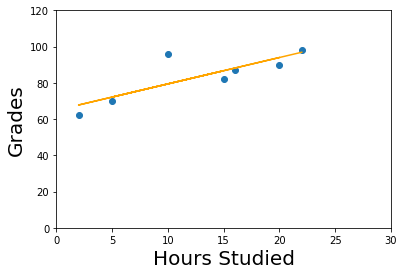

In [13]:
#Now we will plot our scatter plot again

plt.scatter(x_matrix, y)
fig = plt.plot(x_matrix, y_hat, c='orange', label='regression line')
plt.xlabel('Hours Studied', fontsize=20)
plt.ylabel('Grades', fontsize=20)
plt.xlim(0, 30)
plt.ylim(0, 120)

plt.show()

### 5. Share Insights (Summarize everything I have done)

* If I study more, will I get a higher grade
* The answer is yes, there is a positive correlation between the number of hours spent studying and the grade you will get 

* Specifically with Linear Regression, we saw that the relationship is: Grades = 1.45631891*Hours_studied + 64.84732824
* So if you spend 10hours studying, you can expect to get an 80

* However, we saw that Charlie is  a genius, a kind of outlier in our data, and he is inflating the grade estimate. So you will probably get slightly lower than 80


# That's our whole Data Science workflow